### Kaggle competition - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submissions

## 1. Import

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
from scipy import stats
from scipy.stats import skew

In [255]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [256]:
#from umap import UMAP
# import umap.umap_ as UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import decomposition
from category_encoders import TargetEncoder

## 2. Загрузка файлов

In [337]:
load_test = pd.read_csv('test.csv')
load_train = pd.read_csv('train.csv')
pd.set_option('max_columns', None)

In [338]:
# Загружаем файл с ответами, обновляем его при получении лучшего результата
load_test_saleprice = pd.read_csv('submission_2.csv')

In [339]:
load_test['SalePrice'] = load_test_saleprice['SalePrice']

In [340]:
df = pd.concat([load_train, load_test], axis=0)

In [341]:
load_train.shape, load_test.shape

((1460, 81), (1459, 81))

In [342]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,85755.844085
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,84820.283706
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,173092.548981
1457,2918,85,RL,6

In [343]:
df.set_index('Id', inplace=True)

In [344]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## 3. График распределения цен в зависимости от жилой площади

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 4500x3000 with 0 Axes>

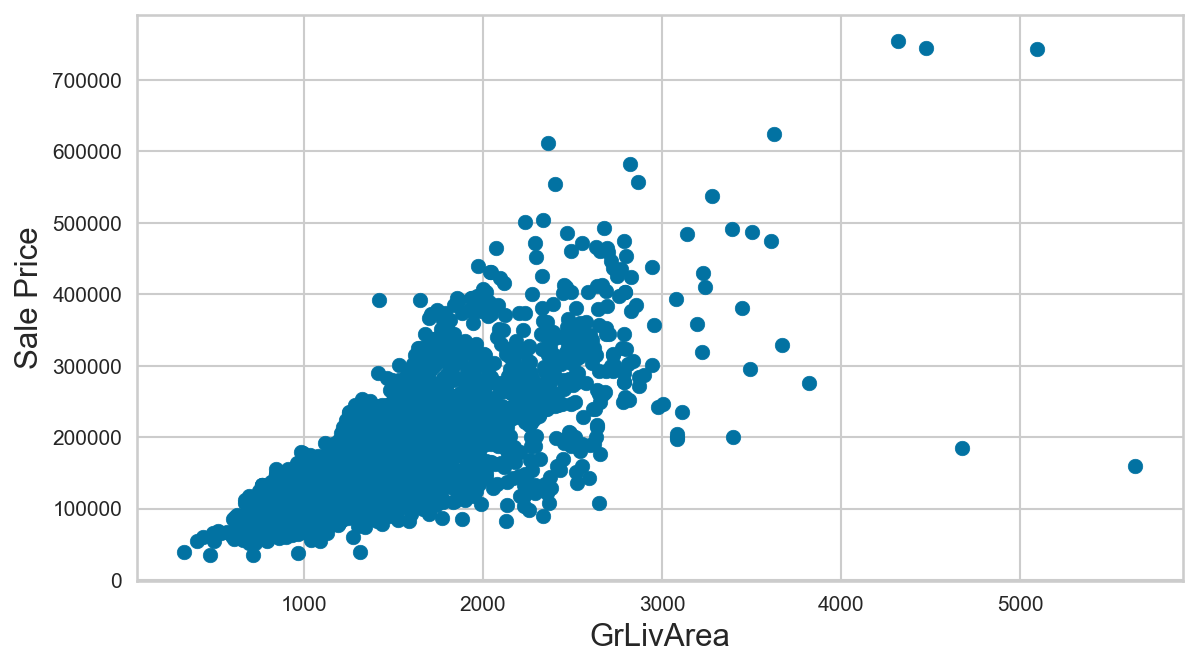

In [345]:
plt.figure(dpi=150, figsize=(30, 20))
fig, ax = plt.subplots(figsize=(9, 5), dpi=150)
ax.scatter(x=df['GrLivArea'], y=df['SalePrice'])
plt.ylabel('Sale Price', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show

## 4. Убираем выбросы

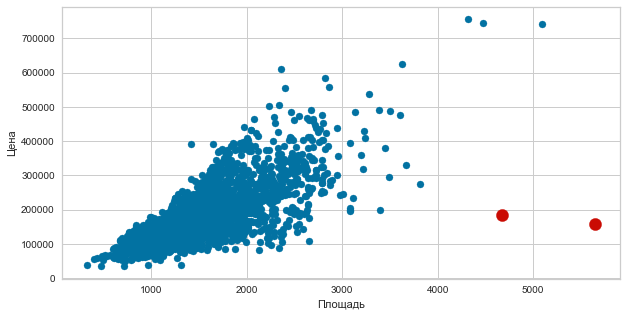

In [346]:
plt.figure(figsize=(10, 5))
v = df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)]
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.scatter(v['GrLivArea'], v['SalePrice'], c='r', s=150)
plt.xlabel('Площадь')
plt.ylabel('Цена');

In [347]:
# Устраняем выбросы
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

In [348]:
df.index = range(1,2918)

In [349]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000000
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000000
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000000
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,85755.844085
2914,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,84820.283706
2915,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,173092.548981
2916,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Ins

## 5. Преобразуем данные

In [350]:
# Корректируем 2207 год
df['GarageYrBlt'].sort_values(ascending=False)

2591    2207.0
987     2010.0
1501    2010.0
379     2010.0
1607    2010.0
         ...  
2892       NaN
2908       NaN
2912       NaN
2913       NaN
2916       NaN
Name: GarageYrBlt, Length: 2917, dtype: float64

In [351]:
# Предполагаем, что это не 2207, а 2007
df['GarageYrBlt'] = df['GarageYrBlt'].apply(lambda x: 2007 if x == 2207 else x)

In [352]:
# В признаке Utilities почти все значения в столбце одинаковы, поэтому избавляемся от него
df['Utilities'].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [353]:
df = df.drop('Utilities', axis=1)

In [354]:
# Переводим objects в nums
objects = list(df.select_dtypes(include=['object']).columns)
num = list(df.select_dtypes(exclude=['object']).columns)
num.remove('SalePrice')
# # bad = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'GarageCars', 'MoSold', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Fireplaces','YrSold', 'BedroomAbvGr', 'KitchenAbvGr']
for el in ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'GarageCars', 'MoSold']:
    objects.append(el)
    num.remove(el)

In [355]:
# Заполняем пустоты
df[['GarageCars', 'BsmtFullBath', 'BsmtHalfBath']] = df[['GarageCars', 'BsmtFullBath', 'BsmtHalfBath']].fillna(0)
# df[bad] = df[bad].fillna(0)

In [356]:
df[num] = df[num].fillna(df[num].median())

In [357]:
# Переводим годы в возраст (2017 тк датасет 2018 года)
df['YearBuilt'] = 2017 - df['YearBuilt']
df['YearRemodAdd'] = 2017 - df['YearRemodAdd']
df['YrSold'] = 2017 - df['YrSold']
df['GarageYrBlt'] = 2017 - df['GarageYrBlt']

In [358]:
df[objects] = df[objects].fillna('No')

In [359]:
# Проверяем, нет ли странных данных - находим один лот, который якобы был отремонтирован до постройки
df[(df['YearBuilt'] - df['YearRemodAdd']) < 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1875,20,RL,65.0,10739,Pave,No,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,15,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Gd,TA,PConc,Gd,TA,No,GLQ,1259.0,Unf,0.0,172.0,1431.0,GasA,Ex,Y,SBrkr,1444,0,0,1444,1.0,0.0,2,0,3,1,Gd,6,Typ,0,No,Attchd,15.0,RFn,2.0,577.0,TA,TA,Y,144,40,0,0,0,0,No,No,No,0,4,8,WD,Normal,213257.943139


In [360]:
# Корректируем "возраст" ремонта
df['YearRemodAdd'][1875] = 15

<ipython-input-360-f16681564d08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearRemodAdd'][1875] = 15


In [361]:
# Проверяем, что странных значений больше не осталось
df[(df['YearBuilt'] - df['YearRemodAdd']) < 0]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## 6. Логарифмируем данные

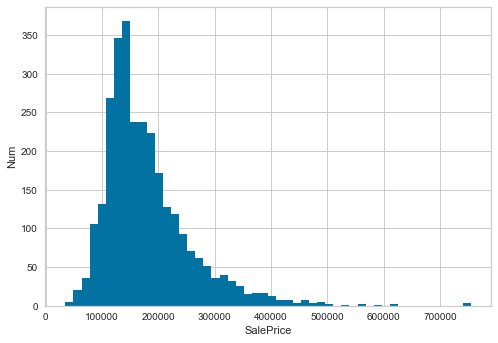

In [362]:
plt.hist(df['SalePrice'], bins=50)
plt.xlabel('SalePrice')
plt.ylabel('Num');

In [363]:
from scipy.stats import skew 
from scipy.special import boxcox1p
skewness = df[num].apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

skewness = skewness[abs(skewness) > 0.5]

skew_features = df[skewness.index[:-2]]
lam = 0.15
for feat in skew_features:
    df[feat] = boxcox1p(df[feat], lam)

df['SalePrice'] = np.log1p(df['SalePrice'])

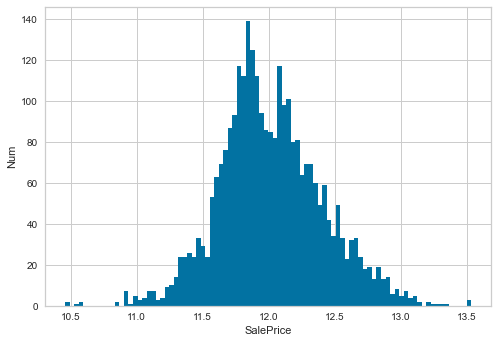

In [364]:
plt.hist(df['SalePrice'], bins=90)
plt.xlabel('SalePrice')
plt.ylabel('Num');

## 7. TargetEncoder для признаков, у которых до 6 уникальных значений

In [365]:
cat = []
obuniq = df[objects].nunique()
for i in range(len(obuniq)):
    if obuniq.values[i] <=6:
        cat.append(obuniq.index[i])

In [366]:
for el in cat:
    encoder = TargetEncoder()
    df[el] = encoder.fit_transform(df[el], df['SalePrice'])

## 8. Ищем корреляции

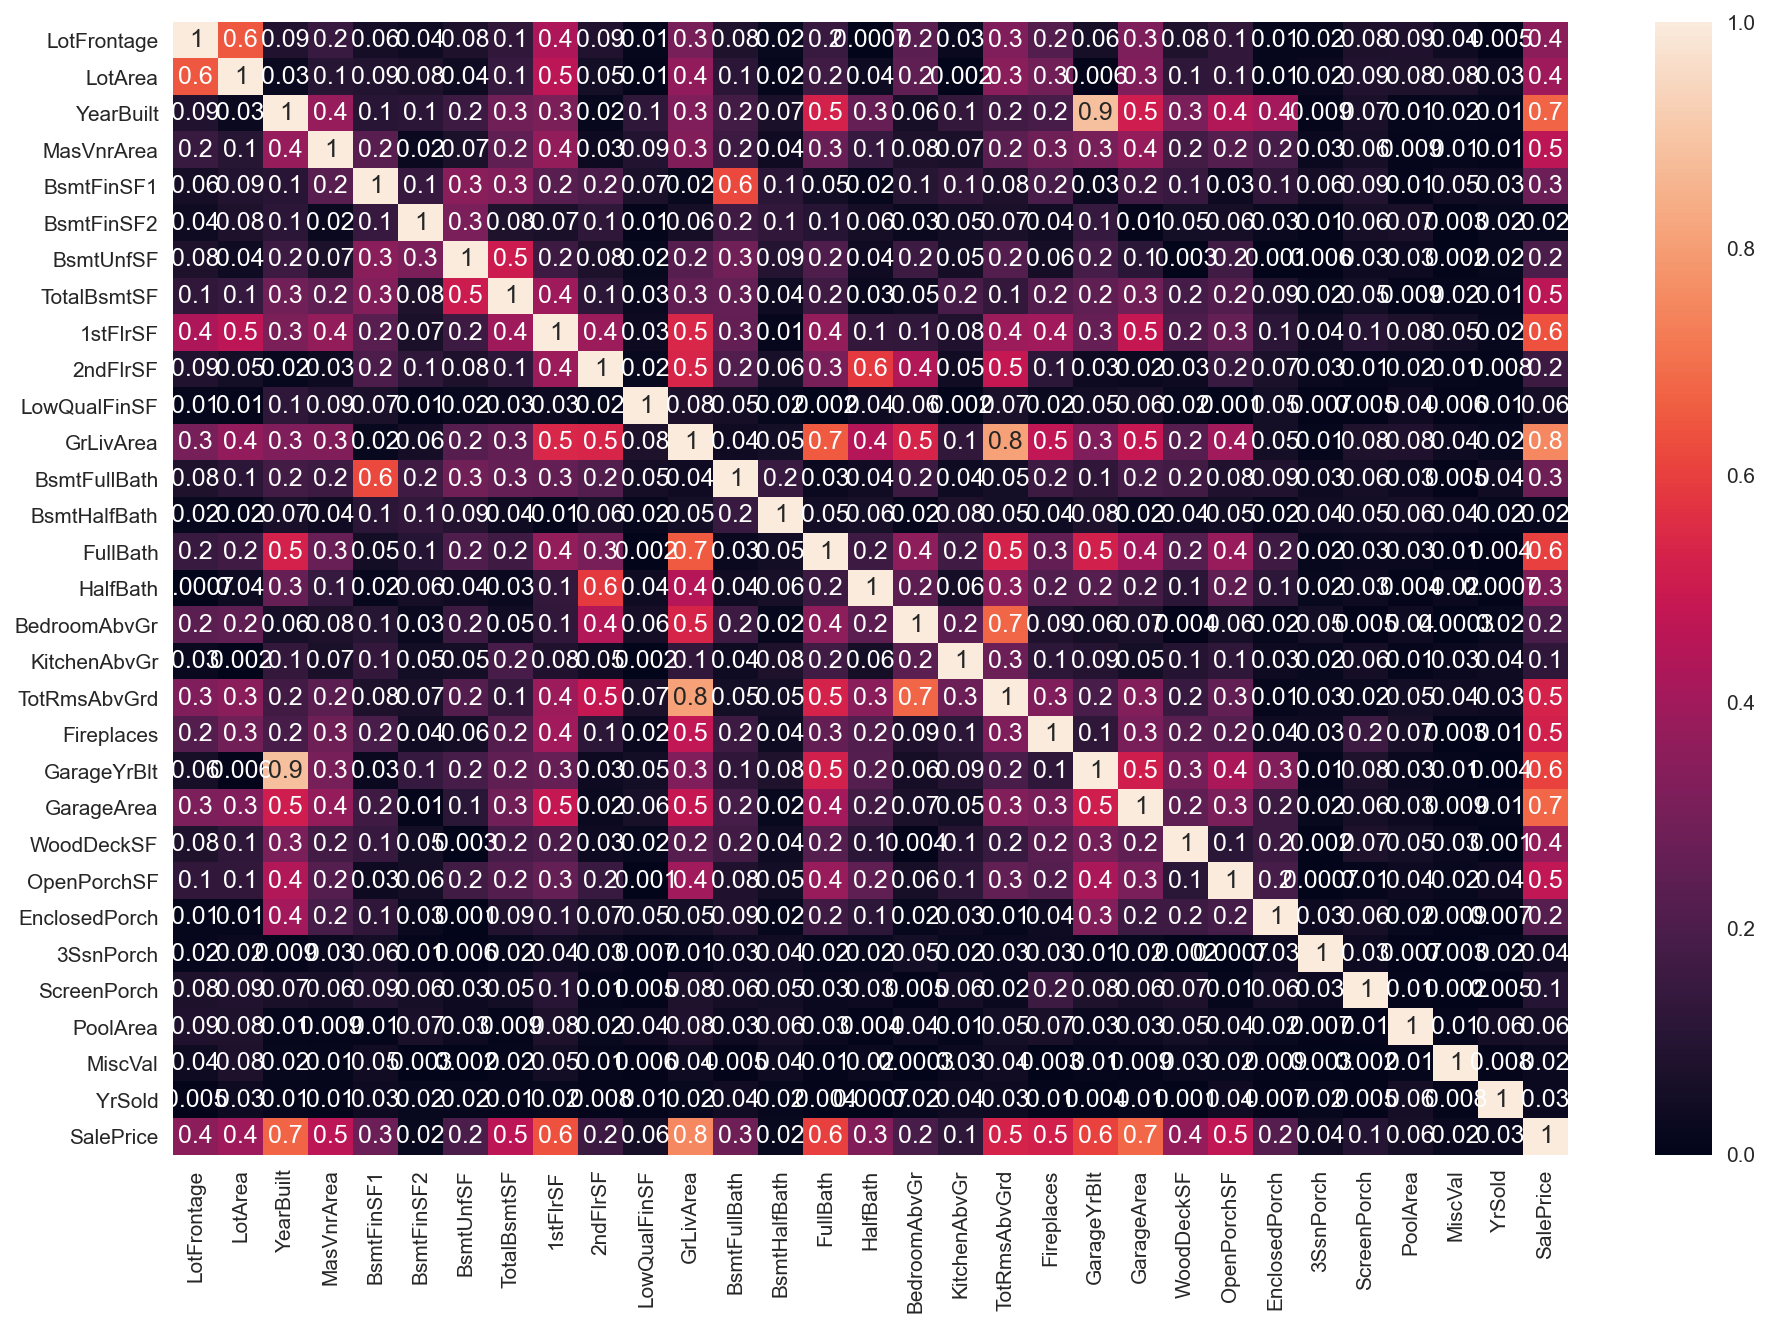

In [367]:
num.append('SalePrice')
plt.figure(figsize=(15,10), dpi=150)
sns.heatmap(df[num].corr().abs(),
                cbar=True,
                 annot=True, vmin=0, vmax=1, fmt='.1g')
num.remove('SalePrice')

## 9. Кластеризация

In [368]:
#from umap import UMAP
#from sklearn.manifold import TSNE
#from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN
from yellowbrick.cluster import SilhouetteVisualizer

In [369]:
#conda install -c conda-forge umap-learn

In [370]:
classes = ['YrSold', 'MiscVal', 'PoolArea', 'ScreenPorch', '3SsnPorch', 'EnclosedPorch', 'KitchenAbvGr', 'HalfBath', 'BsmtHalfBath', 'BsmtFullBath', 'LowQualFinSF', '2ndFlrSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1', 'LotFrontage']#, 'WoodDeckSF', 'TotalBsmtSF', 'MasVnrArea', 'LotArea']

In [371]:
X = StandardScaler().fit_transform(df[classes])

In [372]:
pca = PCA(n_components=2)
# tsne = TSNE(n_components=2, perplexity=20)
# umap = UMAP(n_components=2, n_neighbors=5)

In [373]:
X_pca = pca.fit_transform(X)

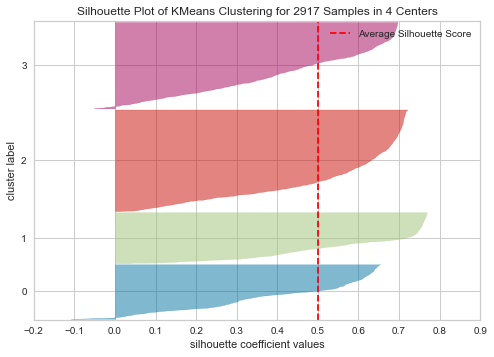

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2917 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [374]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_pca)
visualizer.show()

In [375]:
km = KMeans(4)
km.fit(X_pca)

KMeans(n_clusters=4)

In [376]:
# dbs = DBSCAN(5)
# dbs.fit(X_tsne)

In [377]:
op = km.labels_

In [378]:
df['Classes'] = op

## 10. Encoding

In [379]:
df_encoding = pd.get_dummies(df)

In [380]:
df_encoding[df_encoding['SalePrice'] > 0]['SalePrice']

1       12.247699
2       12.109016
3       12.317171
4       11.849405
5       12.429220
          ...    
2913    11.359271
2914    11.348302
2915    12.061587
2916    11.717139
2917    12.320709
Name: SalePrice, Length: 2917, dtype: float64

In [381]:
flag = df_encoding[df_encoding['SalePrice'] > 0].index.max()
flag

2917

## 11. Создаем тренировочную и тестовую выборки

In [382]:
ss_scaler = StandardScaler()
ss_scaler.fit(df_encoding[num])
df_encoding[num] = ss_scaler.transform(df_encoding[num])

In [383]:
y_df_train = df_encoding.iloc[0:flag]['SalePrice']
x_df_train = df_encoding.iloc[0:flag].drop('SalePrice', axis=1)#.drop(dddroppp, axis=1)

In [384]:
x_df_test = df_encoding[1458:].drop('SalePrice', axis=1)#.drop(dddroppp, axis=1)

In [385]:
# x_df_test = df_encoding[1458:].drop('SalePrice', axis=1)

In [386]:
# y_df_train = df_encoding[:1458]['SalePrice']
# x_df_train = df_encoding[:1458].drop('SalePrice', axis=1)

In [387]:
df_encoding['KitchenQual'] = df_encoding['KitchenQual'].fillna(df['KitchenQual'].median())
df_encoding['MSZoning'] = df_encoding['MSZoning'].fillna(df['MSZoning'].median())

In [388]:
x_df_test['KitchenQual'].isna().any()

False

In [389]:
x_df_test['MSZoning'].isna().any().sum()

0

In [390]:
(x_df_train.shape, x_df_test.shape)

((2917, 196), (1459, 196))

## 12. Обучение

In [391]:
x_train, x_valid, y_train, y_valid = train_test_split(x_df_train, y_df_train.to_numpy(), random_state=42, test_size = 0.5)

In [392]:
lin = (LinearRegression())
       
lin.fit(x_train, y_train)
er_lin = mean_squared_error(np.expm1(lin.predict
                                     (x_valid)), np.expm1(y_valid))
print("train mse:", mean_squared_error(np.expm1(lin.predict(x_train)), np.expm1(y_train)))
print("test mse:", er_lin)

train mse: 157111856.14839157
test mse: 258388982.44329873


In [393]:
lass = LassoCV(alphas=np.arange(0.0001, 1, 0.1))

lass.fit(x_train, y_train)
er_lass = mean_squared_error(np.expm1(lass.predict(x_valid)), np.expm1(y_valid))
print("train mse:", mean_squared_error(np.expm1(lass.predict(x_train)), np.expm1(y_train)))
print("test mse:", er_lass)

train mse: 169132894.82421792
test mse: 244273577.31924245


In [394]:
ridg = RidgeCV(alphas=np.arange(0.1, 3, 0.1))

ridg.fit(x_train, y_train)

er_ridg = mean_squared_error(np.expm1(ridg.predict(x_valid)), np.expm1(y_valid))
print("train mse:", mean_squared_error(np.expm1(ridg.predict(x_train)), np.expm1(y_train)))
print("test mse:", er_ridg)

train mse: 166175205.93544918
test mse: 245681142.27257866


In [395]:
gbr = GradientBoostingRegressor(max_depth=2, learning_rate = 0.5, n_estimators=100) #была переобучена

gbr.fit(x_train, y_train)
er_gbr = mean_squared_error(np.expm1(gbr.predict(x_valid)), np.expm1(y_valid))
print("train mse:", mean_squared_error(np.expm1(gbr.predict(x_train)), np.expm1(y_train)))
print("test mse:", er_gbr)

train mse: 110574066.82087956
test mse: 323745249.0335445


In [396]:
def blend(x, a=0.5, m1=lass, m2=gbr):
    return (a * m1.predict(x)) + ((1 - a) * m2.predict(x))

print("test MSE:", mean_squared_error(np.expm1(blend(x_valid)), np.expm1(y_valid)))

test MSE: 237323860.23261866


In [397]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=10)

rfr.fit(x_train, y_train)
er_rfr = mean_squared_error(np.expm1(rfr.predict(x_valid)), np.expm1(y_valid))
print("train mse:", mean_squared_error(np.expm1(rfr.predict(x_train)), np.expm1(y_train)))
print("test mse:", er_rfr)

train mse: 94251346.54042032
test mse: 486995330.5660577


In [398]:
cat = CatBoostRegressor(depth=5, learning_rate = 0.06,  silent = True, boosting_type='Plain', bootstrap_type='MVS')

cat.fit(x_train, y_train)
er_cat = mean_squared_error(np.expm1(cat.predict(x_valid)), np.expm1(y_valid))
print("train mse:", mean_squared_error(np.expm1(cat.predict(x_train)), np.expm1(y_train)))
print("test mse:", er_cat)

train mse: 26207952.328120824
test mse: 294281414.2046811


In [399]:
print("test MSE:", mean_squared_error(np.expm1(blend(x_valid,m1=lass, m2=cat, a=0.6)), np.expm1(y_valid)))

test MSE: 233436386.92657468


In [400]:
estimators = [('tree', DecisionTreeRegressor()), ('knn', LinearRegression())]
stack_knn_tree = StackingRegressor(estimators=estimators)

stack_knn_tree.fit(x_train, y_train.ravel())

er_test_stack_knn_tree = mean_squared_error(np.expm1(stack_knn_tree.predict(x_valid)), np.expm1(y_valid))
print("train mse:", mean_squared_error(np.expm1(stack_knn_tree.predict(x_train)), np.expm1(y_train)))
print("test mse:", er_test_stack_knn_tree)

train mse: 133270220.31443346
test mse: 265502143.26425034


In [401]:
estimators = [('tree', DecisionTreeRegressor()), ('knn', CatBoostRegressor(depth=5, learning_rate = 0.06,  silent = True, boosting_type='Plain', bootstrap_type='MVS'))]
stack_cat_tree = StackingRegressor(estimators=estimators)

stack_cat_tree.fit(x_train, y_train.ravel())

er_test_stack_cat_tree = mean_squared_error(np.expm1(stack_cat_tree.predict(x_valid)), np.expm1(y_valid))
print("train mse:", mean_squared_error(np.expm1(stack_cat_tree.predict(x_train)), np.expm1(y_train)))
print("test mse:", er_test_stack_cat_tree)

train mse: 25795996.492425106
test mse: 291343499.89455926


In [402]:
estimators = [('tree', DecisionTreeRegressor()), ('knn', CatBoostRegressor(depth=5, learning_rate = 0.06,  silent = True, boosting_type='Plain', bootstrap_type='MVS'))]
stack = StackingRegressor(estimators=estimators)#, final_estimator=XGBRegressor(n_estimators=980, max_depth=4, subsample=0.6, learning_rate=0.08))

stack.fit(x_train, y_train.ravel())

er_stack = mean_squared_error(np.expm1(stack.predict(x_valid)), np.expm1(y_valid))
print("train mse:", mean_squared_error(np.expm1(stack.predict(x_train)), np.expm1(y_train)))
print("test mse:", er_stack)

train mse: 25687894.737443645
test mse: 291638235.36161333


In [403]:
model = XGBRegressor(n_estimators=300, max_depth=3, subsample=0.6, learning_rate=0.5)#, eta=0.3)

model.fit(x_train, y_train.ravel())
er_model = mean_squared_error(np.expm1(model.predict(x_valid)), np.expm1(y_valid))
print("train mse:", mean_squared_error(np.expm1(model.predict(x_train)), np.expm1(y_train)))
print("test mse:", er_model)

train mse: 6745012.576424673
test mse: 472584274.33142966


In [404]:
print("test MSE:", mean_squared_error(np.expm1(blend(x_valid, m2=stack_cat_tree, a=0.5)), np.expm1(y_valid)))

test MSE: 235820990.51131406


In [405]:
print("test MSE:", mean_squared_error(np.expm1(blend(x_valid, m1=ridg, a=0.5)), np.expm1(y_valid)))

test MSE: 236646680.75550723


In [406]:
print("test MSE:", mean_squared_error(np.expm1(blend(x_valid, m1=cat, m2=stack_knn_tree,a=0.5)), np.expm1(y_valid)))

test MSE: 246560675.0072292


In [407]:
gg = 0.1*model.predict(x_valid) + 0.3*ridg.predict(x_valid) + 0.3*lass.predict(x_valid)+0.3*cat.predict(x_valid)#+0.05*lin.predict(x_valid)# +0.05*stack_cat_tree.predict(x_valid)
print("test MSE:", mean_squared_error(np.expm1(gg), np.expm1(y_valid)))

test MSE: 232537999.65031812


In [408]:
gg = 0.3*ridg.predict(x_valid) + 0.2*lass.predict(x_valid)+0.3*cat.predict(x_valid)+0.05*lin.predict(x_valid) + 0.15*model.predict(x_valid)
gg1 = 0.3*ridg.predict(x_train) + 0.2*lass.predict(x_train)+0.3*cat.predict(x_train)+0.05*lin.predict(x_train) + 0.15*model.predict(x_train)
print("train mse:", mean_squared_error(np.expm1(gg1), np.expm1(y_train)))
print("test MSE:", mean_squared_error(np.expm1(gg), np.expm1(y_valid) ))

train mse: 69785046.91993539
test MSE: 234773073.93696675


In [409]:
gg = 0.3*ridg.predict(x_valid) + 0.2*lass.predict(x_valid)+0.3*cat.predict(x_valid)+0.05*lin.predict(x_valid) + 0.15*stack_cat_tree.predict(x_valid)
gg1 = 0.3*ridg.predict(x_train) + 0.2*lass.predict(x_train)+0.3*cat.predict(x_train)+0.05*lin.predict(x_train) + 0.15*stack_cat_tree.predict(x_train)
print("train mse:", mean_squared_error(np.expm1(gg1), np.expm1(y_train)))
print("test MSE:", mean_squared_error(np.expm1(gg), np.expm1(y_valid)))

train mse: 77011578.14811346
test MSE: 234925527.14310175


In [410]:
gg = 0.35*ridg.predict(x_valid) + 0.3*lass.predict(x_valid)+0.2*cat.predict(x_valid) + 0.15*stack_cat_tree.predict(x_valid)
gg1 = 0.35*ridg.predict(x_train) + 0.3*lass.predict(x_train)+0.2*cat.predict(x_train)+ 0.15*stack_cat_tree.predict(x_train)
print("train mse:", mean_squared_error(np.expm1(gg1), np.expm1(y_train)))
print("test MSE:", mean_squared_error(np.expm1(gg), np.expm1(y_valid)))

train mse: 93611166.49072778
test MSE: 232257629.390085


In [411]:
mean_squared_error(gg, y_valid)

0.007043296126909702

In [412]:
ddd = pd.DataFrame(np.expm1(gg), columns=['gg'])
ddd['valid'] = np.expm1(y_valid)
ddd['er'] = ddd['gg'] - ddd['valid']
(ddd[ddd['er'] < 0]['er'].sum(), ddd[ddd['er'] > 0]['er'].sum())

(-6316176.800464691, 5406770.6673295405)

## 13. Делаем предикт

In [224]:
# cat_test = CatBoostRegressor(depth=2, learning_rate = 0.5, iterations=50, silent = True)
# cat_test.fit(x_df_train, y_df_train.to_numpy())
# lass_test = LassoCV(alphas=np.arange(0.001, 1))
# lass_test.fit(x_df_train, y_df_train.to_numpy())

# best_tets = np.expm1(blend(x_df_test, m2=cat_test, m1=lass_test ,a=0.5))

In [225]:
# lass_test = LassoCV(alphas=np.arange(0.0001, 1))
# lass_test.fit(x_df_train, y_df_train.to_numpy())
# estimators = [('tree', DecisionTreeRegressor()), ('knn', CatBoostRegressor(depth=3, learning_rate = 0.5, iterations=180, silent = True))]
# stack_cat_tree_test = StackingRegressor(estimators=estimators)
# stack_cat_tree_test.fit(x_df_train, y_df_train.to_numpy())

# best_tets = np.expm1(blend(x_df_test, m2=stack_cat_tree, m1=lass_test, a=0.5))

In [226]:
# lass_test = LassoCV(alphas=np.arange(0.0001, 1))
# lass_test.fit(x_df_train, y_df_train.to_numpy())

# best_tets = np.expm1(lass_test.predict(x_df_test))

In [227]:
# x_train, x_valid, y_train, y_valid = train_test_split(x_df_train, y_df_train.to_numpy(), random_state=42, test_size = 0.25)

# ridg_test = RidgeCV(alphas=np.arange(0.1, 1))
# ridg_test.fit(x_train, y_train.ravel())
# cat_test = CatBoostRegressor(depth=2, learning_rate = 0.5, iterations=170, silent = True)
# cat_test.fit(x_train, y_train.ravel())
# lass_test = LassoCV(alphas=np.arange(0.001, 1))
# lass_test.fit(x_train, y_train.ravel())
# lin_test = (LinearRegression())    
# lin_test.fit(x_train, y_train.ravel())
# model_test = XGBRegressor(n_estimators=50, max_depth=2)#, eta=0.3)
# model_test.fit(x_train, y_train.ravel())


# best_tets = np.expm1(0.2*model_test.predict(x_df_test) + 0.3*ridg_test.predict(x_df_test) + 0.3*lass_test.predict(x_df_test)+0.2*cat_test.predict(x_df_test))# + 0.05*lin_test.predict(x_df_test))

In [228]:
# ridg_test = RidgeCV(alphas=np.arange(0.1, 1))
# ridg_test.fit(x_df_train, y_df_train.to_numpy())
# cat_test = CatBoostRegressor(depth=2, learning_rate = 0.5, iterations=300, silent = True)
# cat_test.fit(x_df_train, y_df_train.to_numpy())
# lass_test = LassoCV(alphas=np.arange(0.001, 1))
# lass_test.fit(x_df_train, y_df_train.to_numpy())
# lin_test = (LinearRegression())    
# lin_test.fit(x_df_train, y_df_train.to_numpy())
# model_test = XGBRegressor(n_estimators=200, max_depth=2)#, eta=0.3)
# model_test.fit(x_df_train, y_df_train.to_numpy())
# # model_test = XGBRegressor(max_depth=8, subsample=0.65, n_estimators=1500, eta=0.02, reg_alpha=1, reg_lambda=22, min_child_weight=19)#, eta=0.3)
# # model_test.fit(x_df_train, y_df_train.to_numpy())



# best_tets = np.expm1(0.15*model_test.predict(x_df_test) + 0.3*ridg_test.predict(x_df_test) + 0.1*lass_test.predict(x_df_test)+0.35*cat_test.predict(x_df_test) + 0.1*lin_test.predict(x_df_test))
# # best_tets = np.expm1(0.3*ridg_test.predict(x_df_test) + 0.1*lass_test.predict(x_df_test)+0.35*cat_test.predict(x_df_test) + 0.1*lin_test.predict(x_df_test))

In [413]:
ridg_test = RidgeCV(alphas=np.arange(0.1, 1))
ridg_test.fit(x_df_train, y_df_train.to_numpy())
cat_test = CatBoostRegressor(depth=5, learning_rate = 0.06,  silent = True, boosting_type='Plain', bootstrap_type='MVS')
cat_test.fit(x_df_train, y_df_train.to_numpy())
lass_test = LassoCV(alphas=np.arange(0.001, 1))
lass_test.fit(x_df_train, y_df_train.to_numpy())
lin_test = (LinearRegression())    
lin_test.fit(x_df_train, y_df_train.to_numpy())
model_test = XGBRegressor(n_estimators=300, max_depth=3, subsample=0.6, learning_rate=0.08)#, eta=0.3)
model_test.fit(x_df_train, y_df_train.to_numpy())

estimators = [('tree', DecisionTreeRegressor()), ('knn', CatBoostRegressor(depth=5, learning_rate = 0.06051124830985223,  silent = True, boosting_type='Plain', bootstrap_type='MVS'))]
stack_cat_tree_test = StackingRegressor(estimators=estimators)
stack_cat_tree_test.fit(x_df_train, y_df_train.to_numpy())

best_test = np.expm1(0.15*model_test.predict(x_df_test) + 0.35*ridg_test.predict(x_df_test) + 0.3*lass_test.predict(x_df_test)+0.2*cat_test.predict(x_df_test))
#best_test = np.expm1(0.15*stack_cat_tree_tets.predict(x_df_test) + 0.35*ridg_test.predict(x_df_test) + 0.3*lass_test.predict(x_df_test)+0.2*cat_test.predict(x_df_test))
#best_test = np.expm1(0.15*model_test.predict(x_df_test) + 0.3*ridg_test.predict(x_df_test) + 0.1*lass_test.predict(x_df_test)+0.35*cat_test.predict(x_df_test) + 0.1*lin_test.predict(x_df_test))

In [414]:
best_test.shape

(1459,)

## 14. Загрузка на Kaggle

In [415]:
d = {'Id': range(1461, 2920), 'SalePrice': best_test}
test_df = pd.DataFrame(d)

In [416]:
test_df.index = test_df.index + 1
test_df

,Id,SalePrice
1,1461,117501.925242
2,1462,157060.757194
3,1463,183973.108489
4,1464,194098.347244
5,1465,189097.403432
...,...,...
1455,2915,85950.578231
1456,2916,84361.534515
1457,2917,173343.856396
1458,2918,120999.345982


In [417]:
test_df.to_csv('submission_3.csv', header=True, index=False)

In [252]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission_1.csv -m ""

401 - Unauthorized
